In [1]:
from func_model_methods  import *
from func_sampling_methods import *
from func_data import*

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df=pd.read_csv(r"D:\data\diabetes_012_health_indicators_BRFSS2015.csv")

df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [3]:
df.rename(columns={"Diabetes_012": "Diabetes"}, inplace=True)

map = {
    0: 0,
    1: 1,
    2: 1,
    
}
df["Diabetes"] = df["Diabetes"].replace(map)

In [4]:
print(df.shape)
df.dropna # odrzucamy wiersze z wartościami NaN
df.shape

(253680, 22)


(253680, 22)

In [5]:
df = df.sample(n=30000)

In [6]:
# zmienna określana Diabetes
Y = df['Diabetes'].values
X = df.drop(['Diabetes'], axis=1)

print(X.shape)

(30000, 21)


In [7]:
n_positive,n_negative=get_value_distribution(Y)

Number of positive: 4739, number of negative: 25261


In [8]:
df.describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.157967,0.422967,0.426100,0.962600,28.373200,0.439833,0.040933,0.094367,0.761267,0.633000,...,0.949667,0.085133,2.511467,3.192800,4.179667,0.165900,0.440367,8.016067,5.052967,6.041200
std,0.364716,0.494038,0.494517,0.189743,6.598205,0.496375,0.198139,0.292343,0.426317,0.481995,...,0.218636,0.279085,1.069130,7.406749,8.662972,0.371997,0.496439,3.055092,0.986742,2.074877
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
data_split=dataset_split(X,Y,test_size=0.15)

In [10]:
#listy samplingów do sprawdzenia
func_list=[data_oversampling,data_undersampling,data_smote]
func_list_2=[data_adasyn,data_smote_tomek]
func_list_3=[data_kmean_smote]

In [11]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [12]:
params_xgb_boost= {
        'min_child_weight': [1, 2, 5],
        'gamma': [0.5, 1],
        'subsample': [0.6,1.0],
        'colsample_bytree': [0.6,1.0],
        'max_depth': [3, 6, 10]
        }

{'xgbmodel__colsample_bytree': 1.0, 'xgbmodel__gamma': 0.5, 'xgbmodel__max_depth': 3, 'xgbmodel__min_child_weight': 1, 'xgbmodel__subsample': 0.6}
Best Threshold=1.000000, G-mean=0.489


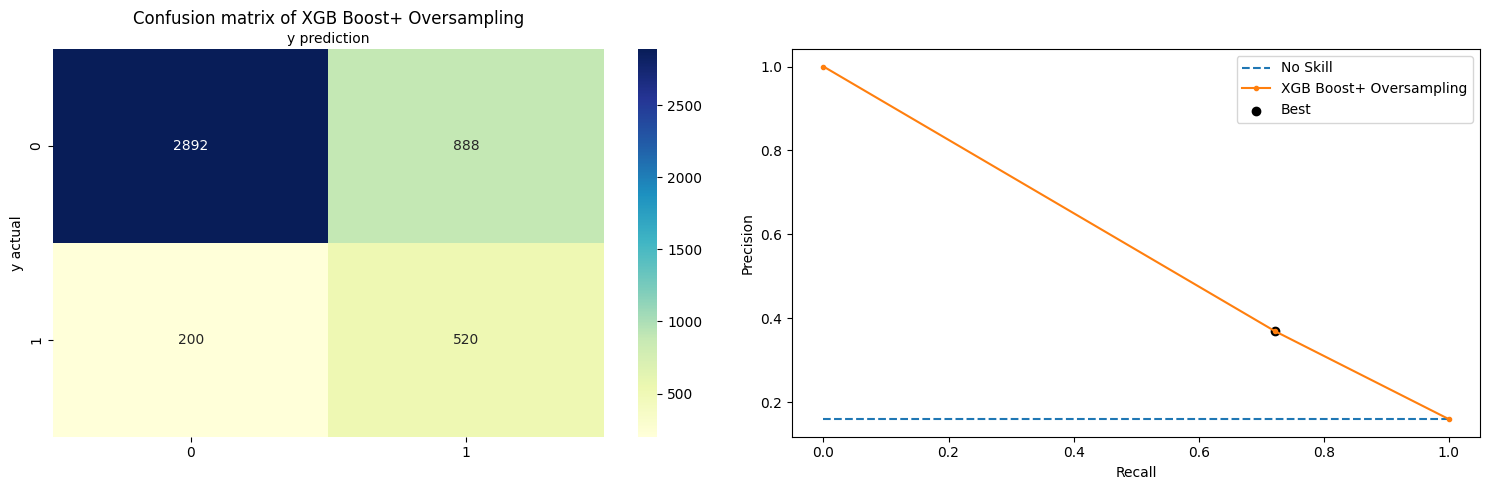

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:190: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


{'xgbmodel__colsample_bytree': 0.6, 'xgbmodel__gamma': 1, 'xgbmodel__max_depth': 6, 'xgbmodel__min_child_weight': 2, 'xgbmodel__subsample': 1.0}
Best Threshold=1.000000, G-mean=0.485


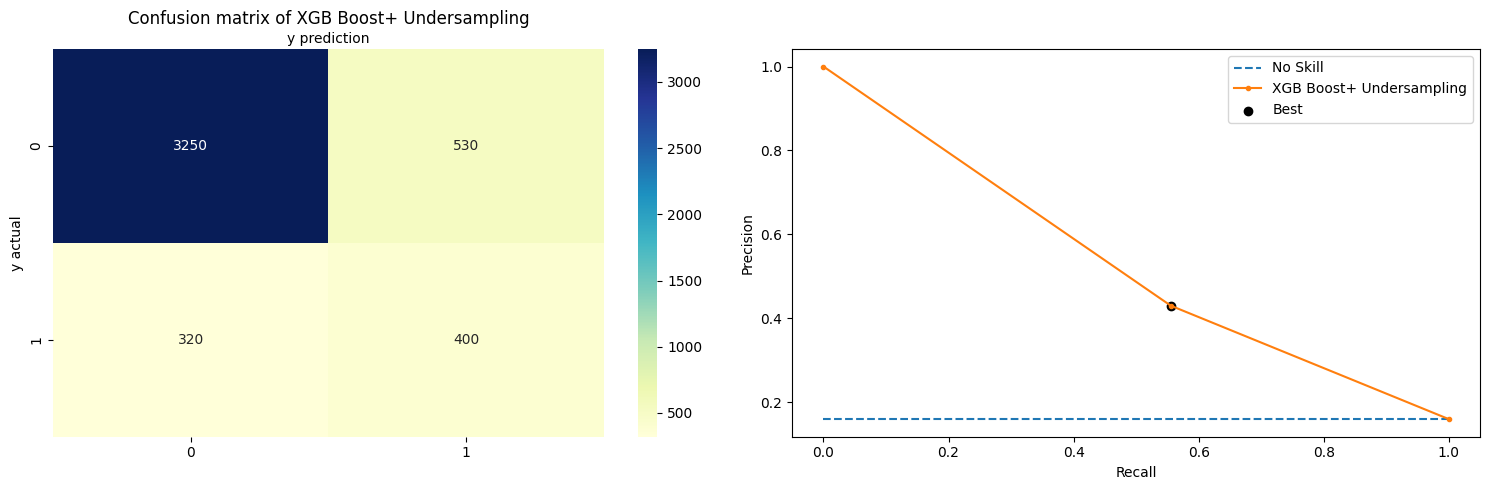

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:190: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


{'xgbmodel__colsample_bytree': 1.0, 'xgbmodel__gamma': 0.5, 'xgbmodel__max_depth': 10, 'xgbmodel__min_child_weight': 5, 'xgbmodel__subsample': 0.6}
Best Threshold=1.000000, G-mean=0.325


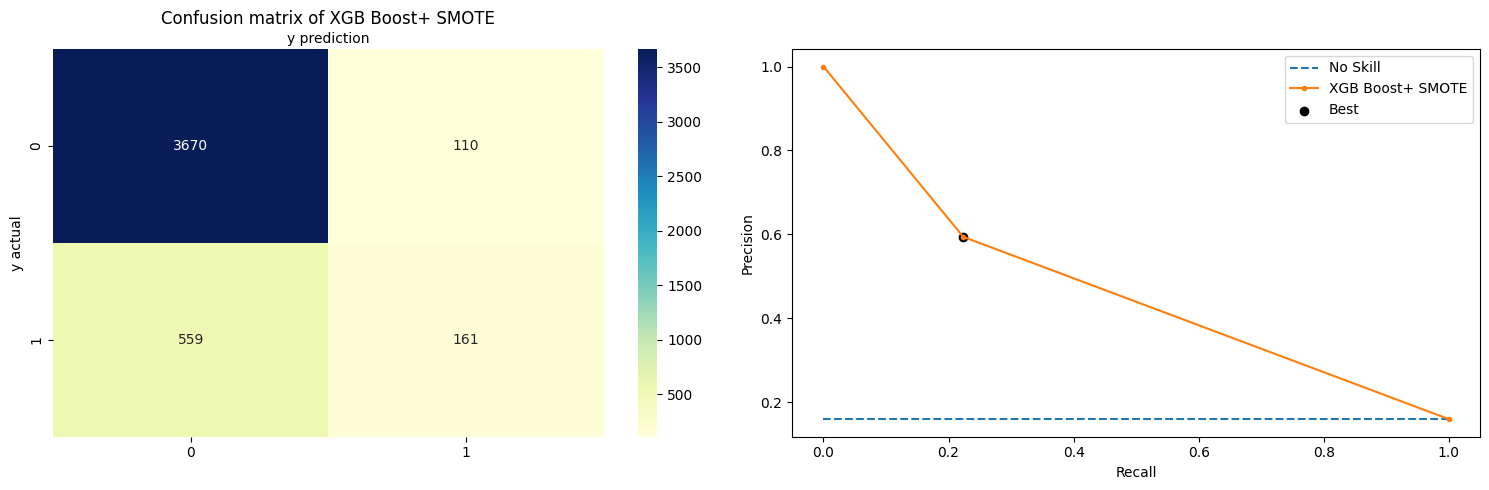

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:190: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


,XGB Boost,Recall 0,Precision 0,Recall 1,Precision 1,F1 Score,Accuracy,Roc Auc
0,Oversampling,0.765079,0.935317,0.722222,0.369318,0.488722,0.758222,0.813546
1,Undersampling,0.859788,0.910364,0.555556,0.430108,0.484848,0.811111,0.814823
2,SMOTE,0.970899,0.867817,0.223611,0.594096,0.324924,0.851333,0.817966


In [13]:
xgb_boost_classifier(func_list,params_xgb_boost,data_split)


{'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__min_samples_split': 50}
Best Threshold=1.000000, G-mean=0.473


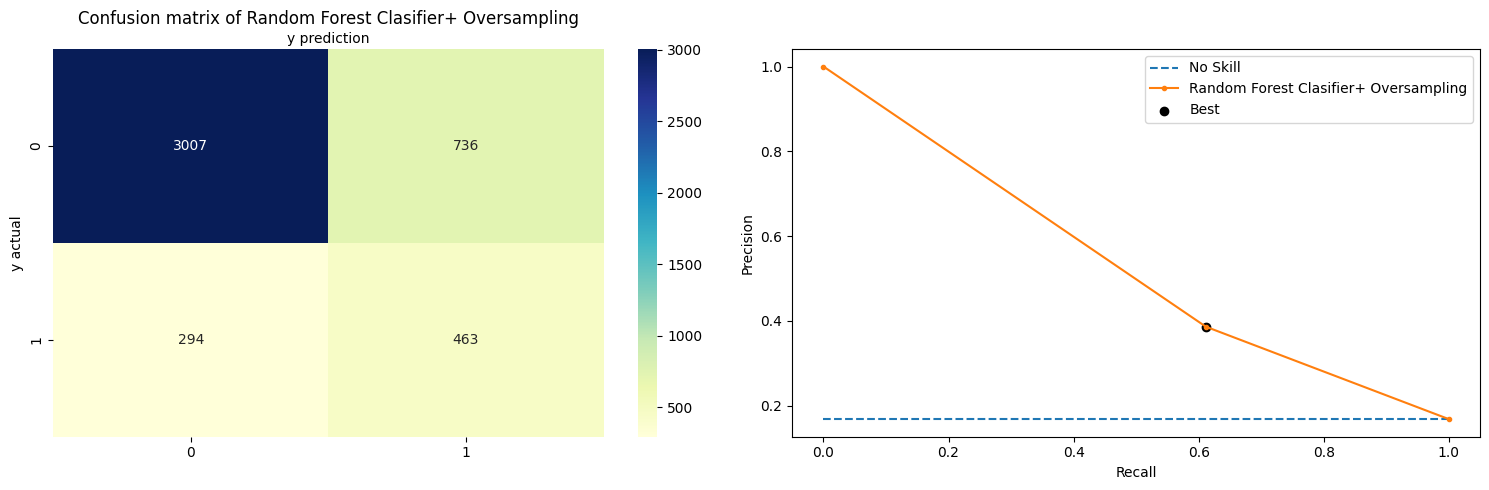

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


{'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 10}
Best Threshold=1.000000, G-mean=0.465


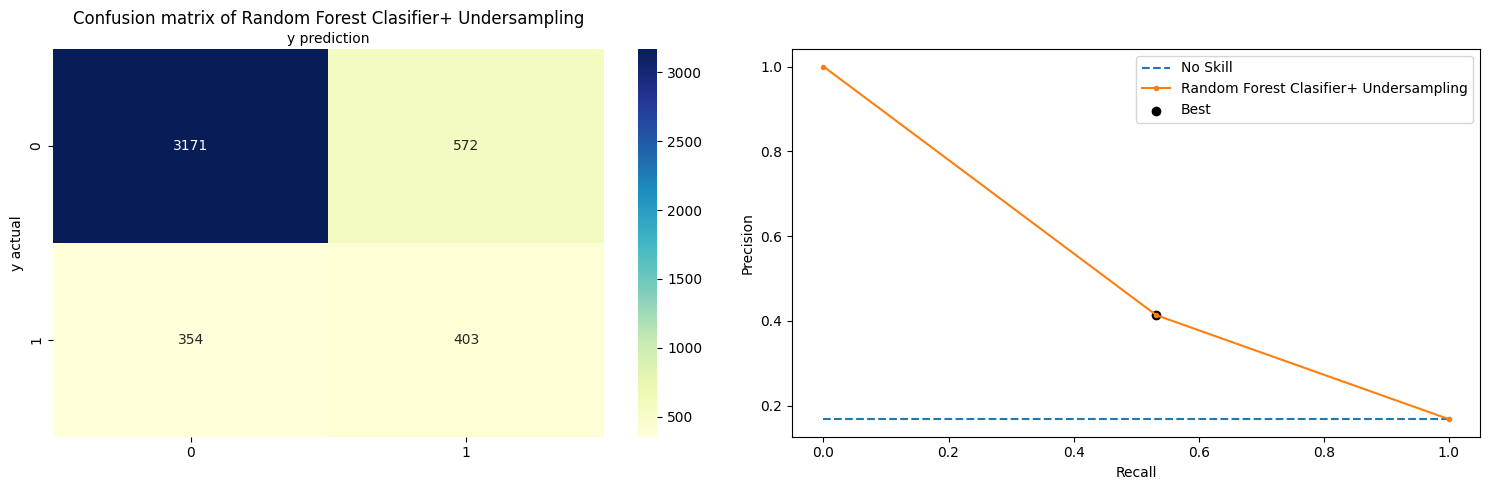

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 30}
Best Threshold=1.000000, G-mean=0.341


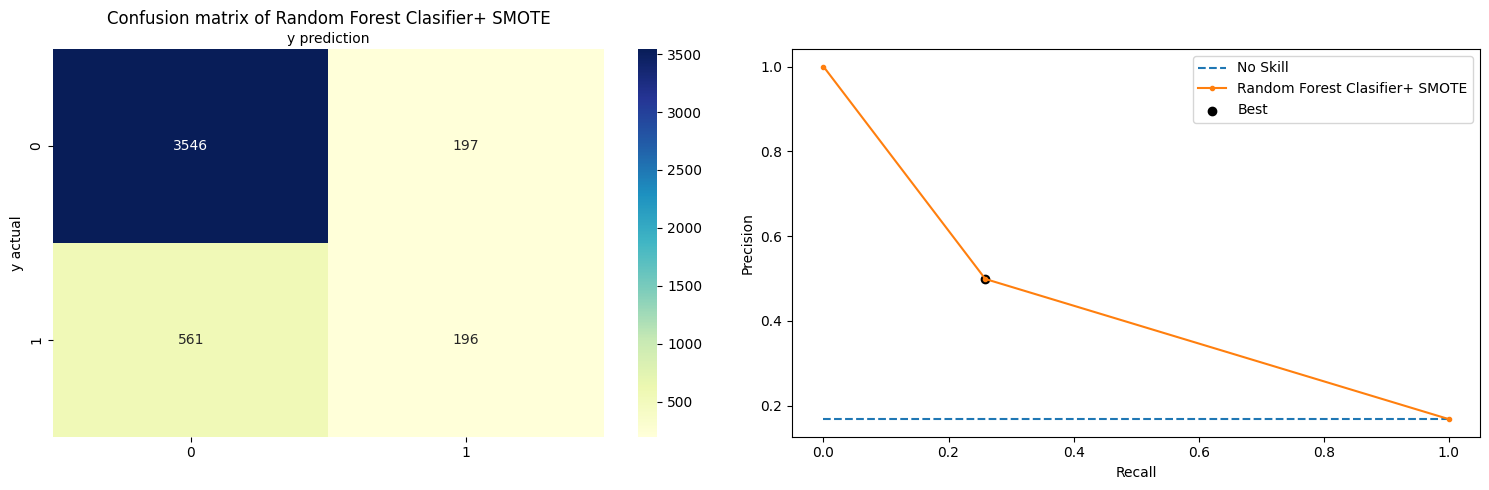

c:\Users\karol\Desktop\machine_learning\licnecnjat\func_model_methods.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_score=df_score.append(pd.Series(ndf, index=df_score.columns[:len(ndf)]), ignore_index=True)


,Random Forest,Recall 0,Precision 0,Recall 1,Precision 1,F1 Score,Accuracy,Roc Auc
0,Oversampling,0.803366,0.910936,0.611625,0.386155,0.473415,0.771111,0.804791
1,Undersampling,0.847181,0.899574,0.532365,0.413333,0.465358,0.794222,0.799874
2,SMOTE,0.947368,0.863404,0.258917,0.498728,0.340870,0.831556,0.786727


In [23]:
params_random_forest={'max_depth': [5, 10, None],
                    'min_samples_split': [10, 30, 50],
                    'min_samples_leaf': [1, 2, 3]}
random_forest(func_list,params_random_forest,data_split)

In [13]:


paramas_svc={"C": [1,5,7],
            "gamma":[0.1,0.01,1e-3],
            "kernel":["linear","rbf"]
            }
svc(func_list,paramas_svc,data_split)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


KeyboardInterrupt: 

In [14]:
params_balanced={
    "n_estimators":[100,300,500],
    "sampling_strategy":['majority','auto'],
    'max_depth': [5, 10, None],
    'min_samples_split': [10, 30, 50],
    'min_samples_leaf': [1, 2, 3]
    }

balanced_random_forest_classifier(params_balanced,data_split)

KeyboardInterrupt: 

In [15]:
params_rus={
     "sampling_strategy":['majority','auto']
    
}
rus_boost_classifier(params_rus,data_split)

KeyboardInterrupt: 